In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [2]:
from tensorflow.keras.layers import Input,Dense,Conv2D,Flatten,Dropout
from tensorflow.keras.models import Model

In [3]:
#getting data
data=tf.keras.datasets.fashion_mnist

In [74]:
(x_train,y_train),(x_test,y_test)=data.load_data()

In [76]:
#scalling
x_train, x_test = x_train / 255.0, x_test / 255.0

In [77]:
x_train.shape

(60000, 28, 28)

In [78]:
#since cnn has input as (h,w,c) we add an extra dimension

In [79]:
#we used -1 to get new dimension in the last
x_train=np.expand_dims(x_train,-1)

x_test=np.expand_dims(x_test,-1)

In [80]:
x_train.shape

(60000, 28, 28, 1)

In [81]:
#lets determine no of features using sets
k=len(set(y_train))
print('no of unique values are  -', k)

no of unique values are  - 10


In [82]:
#here we use [0] because we dont want N

i=Input(shape=x_train[0].shape)
x=Conv2D(16,(3,3),strides=2,activation='relu')(i)
x=Conv2D(32,(3,3),strides=2,activation='relu')(x)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)#for vectorizing features
x=Dense(128,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)


In [83]:
model=Model(i,x)

In [84]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [85]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5742 - accuracy: 0.7899 - val_loss: 0.4472 - val_accuracy: 0.8228
Epoch 2/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3975 - accuracy: 0.8502 - val_loss: 0.3879 - val_accuracy: 0.8553
Epoch 3/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3512 - accuracy: 0.8666 - val_loss: 0.3675 - val_accuracy: 0.8591
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3198 - accuracy: 0.8802 - val_loss: 0.3420 - val_accuracy: 0.8733
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2974 - accuracy: 0.8891 - val_loss: 0.3273 - val_accuracy: 0.8800
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2738 - accuracy: 0.8969 - val_loss: 0.3232 - val_accuracy: 0.8798
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2574 - accuracy: 0.9029 - val_loss: 0.3059 - val_ac

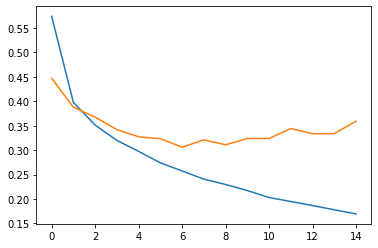

In [86]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'])

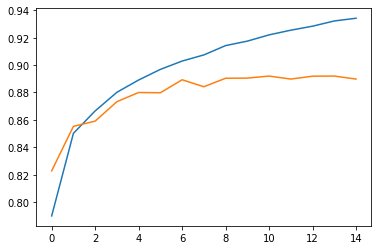

In [87]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

In [88]:
p= model.predict(x_test).argmax(axis=1)

In [89]:
p

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [90]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(p,y_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       987
           1       0.97      0.99      0.98       974
           2       0.87      0.81      0.84      1067
           3       0.88      0.91      0.89       963
           4       0.84      0.80      0.82      1052
           5       0.98      0.97      0.98      1015
           6       0.65      0.69      0.67       935
           7       0.97      0.94      0.95      1029
           8       0.98      0.95      0.97      1022
           9       0.94      0.98      0.96       956

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [65]:
names = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

our prediction  Trouser
 real value  Trouser


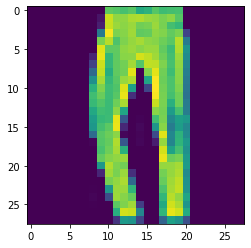

In [73]:

    n=y_test[5]
    m=p[5]
    plt.imshow(x_test[5].reshape(28,28))
    print('our prediction ',names[m])
    print(' real value ',names[n])
    

    
